In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk as nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
# Read in data
df = pd.read_csv('Reviews.csv')
print(df.shape)


(568454, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df = df.drop(['HelpfulnessNumerator', 'HelpfulnessDenominator','Time'], axis=1)

In [5]:
df.head()


,Id,ProductId,UserId,ProfileName,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.describe()

,Id,Score
count,568454.000000,568454.000000
mean,284227.500000,4.183199
std,164098.679298,1.310436
min,1.000000,1.000000
25%,142114.250000,4.000000
50%,284227.500000,5.000000
75%,426340.750000,5.000000
max,568454.000000,5.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Id           568454 non-null  int64 
 1   ProductId    568454 non-null  object
 2   UserId       568454 non-null  object
 3   ProfileName  568438 non-null  object
 4   Score        568454 non-null  int64 
 5   Summary      568427 non-null  object
 6   Text         568454 non-null  object
dtypes: int64(2), object(5)
memory usage: 30.4+ MB


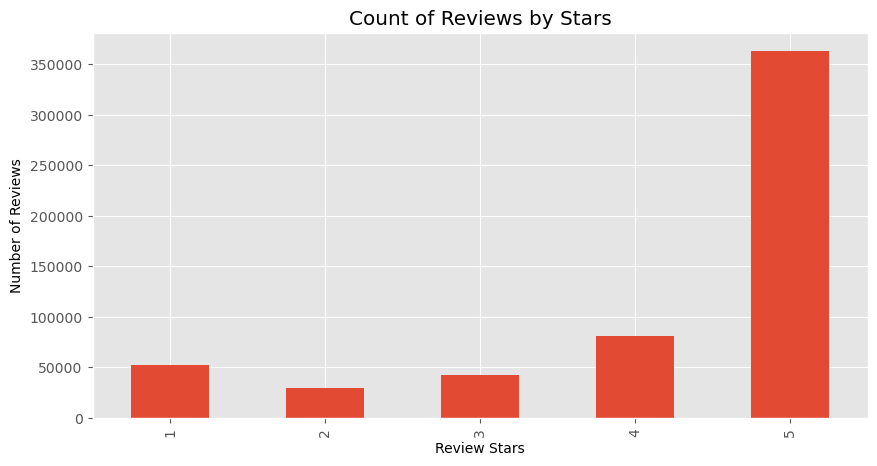

In [8]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Number of Reviews')
plt.show()

In [9]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [10]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [12]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VADER


In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [14]:
sia.polarity_scores('i am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [15]:
sia.polarity_scores('this is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [17]:
#run the polarity score on the entire data set 
res = {}
for i, row in tqdm(df.iterrows() , total=len(df)):
    text = row ['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [18]:
vaders=pd.DataFrame(res).T

In [19]:
vaders=vaders.reset_index().rename(columns={'index': 'Id'})
vaders=vaders.merge(df,how='left')

In [20]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,Score,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...


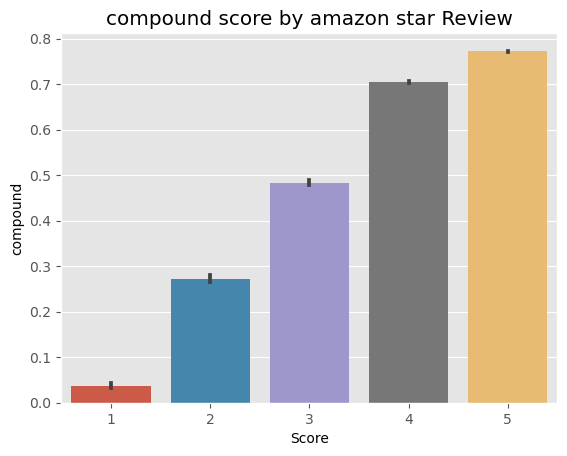

In [21]:
ax=sns.barplot(data=vaders, x='Score',y='compound')
ax.set_title('compound score by amazon star Review')
plt.show()

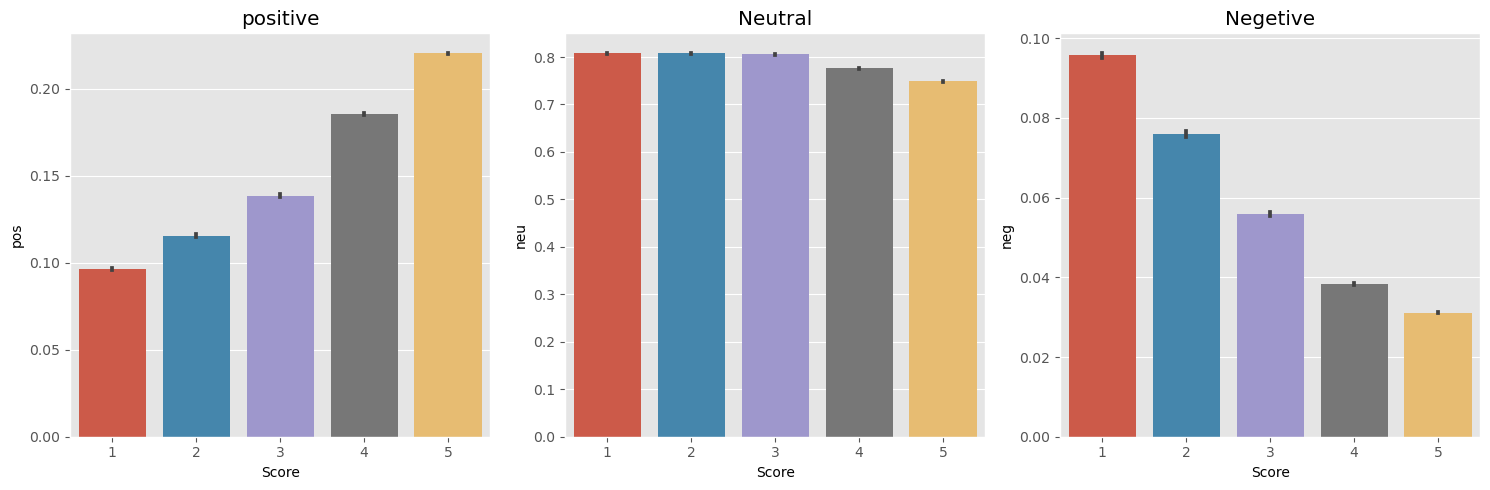

In [22]:
fig, axs=plt.subplots(1,3, figsize =(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negetive')
plt.tight_layout()
plt.show()


In [23]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm

In [24]:
BERT_MODEL = "bert-base-uncased"

In [25]:
tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL)
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

D:\anaconda\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\singh\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [26]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [28]:
# Sentiment analysis using the BERT model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output.logits[0].detach().numpy()

# The BERT model for binary sentiment classification typically has 2 output logits.
# The first element is for the negative sentiment, and the second is for the positive sentiment.
# You can use these logits as follows:
negative_score = softmax(scores[0])
positive_score = softmax(scores[1])

scores_dict = {
    'bert_neg': negative_score,
    'bert_pos': positive_score
}
print(scores_dict)

{'bert_neg': 1.0, 'bert_pos': 1.0}


In [29]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output.logits[0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'bert_neg': scores[0],
    'bert_neu': scores[1],
    'bert_pos': scores[2]
}
print(scores_dict)


IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
def polarity_scores_bert(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output.logits[0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'bert_neg': scores[0],
        'bert_neu': scores[1],
        'bert_pos': scores[2]
    }
    return scores_dict

In [ ]:
res = {}

In [ ]:
for i, row in tqdm(df.iterrows(), total=len(df):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        bert_result = polarity_scores_bert(text)
        both = {**vader_result_rename, **bert_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')
        

In [ ]:
results_df = results_df.rename(columns={
    'vader_neg': 'bert_neg',
    'vader_neu': 'bert_neu',
    'vader_pos': 'bert_pos'
})

In [ ]:
results_df.columns

In [ ]:
sns.pairplot(data=results_df,
             vars=['bert_neg', 'bert_neu', 'bert_pos'],
             hue='Score',
             palette='tab10')
plt.show()

In [ ]:
# Find the text with the highest positive sentiment according to BERT
highest_positive_text_bert = results_df.query('Score == 1').sort_values(
    'bert_pos', ascending=False)['Text'].values[0]

In [ ]:
# Find the text with the highest positive sentiment according to VADER
highest_positive_text_vader = results_df.query('Score == 1').sort_values(
    'vader_pos', ascending=False)['Text'].values[0]

In [ ]:
# Find the text with the highest negative sentiment according to BERT
highest_negative_text_bert = results_df.query('Score == 5').sort_values(
    'bert_neg', ascending=False)['Text'].values[0]

In [ ]:
# Find the text with the highest negative sentiment according to VADER
highest_negative_text_vader = results_df.query('Score == 5').sort_values(
    'vader_neg', ascending=False)['Text'].values[0]